# Spotify's Worldwide Daily Song Ranking

Dataset from: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking  
Crawled from: https://spotifycharts.com/regional  
Crawler code is hosted on github: https://github.com/edumucelli/spotify-worldwide-ranking

The original dataset contains only records of 2017. I modified the scripts found on github, to crawl the data of 2018, up to September.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Load data

In [2]:
df_ranking = pd.read_csv('./spotify_worldwide_daily_song_ranking_2017_2018.csv', parse_dates=['Date'])

In [3]:
df_continents = pd.Series(json.load(open('./continents.json')), name='continent').to_frame()
df_continents.index.name = 'code'
df_continents.reset_index(level=0, inplace=True)

In [4]:
df_countries = pd.read_json('./countries.json', orient='index')
df_countries.index.name = 'code'
df_countries.reset_index(level=0, inplace=True)

## See some items in dataset

In [5]:
df_ranking.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


### Statistical summary

In [6]:
df_ranking.describe(include='all')

,Position,Track Name,Artist,Streams,URL,Date,Region
count,5.875424e+06,5874286,5874286,5.875424e+06,5875417,5875424,5875424
unique,NaN,29045,9203,NaN,35354,618,61
top,NaN,Shape of You,Ed Sheeran,NaN,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-08-31 00:00:00,nz
freq,NaN,32262,181097,NaN,32262,10628,123400
first,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-09-13 00:00:00,NaN
mean,9.497565e+01,NaN,NaN,5.334092e+04,NaN,NaN,NaN
std,5.736224e+01,NaN,NaN,2.062095e+05,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.001000e+03,NaN,NaN,NaN
25%,4.500000e+01,NaN,NaN,3.300000e+03,NaN,NaN,NaN


### Rows contain missing data

In [7]:
df_ranking[df_ranking.isnull().any(axis=1)].head()

,Position,Track Name,Artist,Streams,URL,Date,Region
39428,29,NaN,NaN,7362,https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-20,ec
39456,57,NaN,NaN,4426,https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-20,ec
39463,64,NaN,NaN,4069,https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-20,ec
39490,91,NaN,NaN,3238,https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-20,ec
39631,32,NaN,NaN,7409,https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-21,ec


In [8]:
df_ranking.isnull().sum()

Position         0
Track Name    1138
Artist        1138
Streams          0
URL              7
Date             0
Region           0
dtype: int64

### Drop missing data

In [9]:
df_ranking.dropna(inplace=True)

In [10]:
df_ranking.describe(include='all')

,Position,Track Name,Artist,Streams,URL,Date,Region
count,5.874286e+06,5874286,5874286,5.874286e+06,5874286,5874286,5874286
unique,NaN,29045,9203,NaN,35296,618,61
top,NaN,Shape of You,Ed Sheeran,NaN,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-08-31 00:00:00,nz
freq,NaN,32262,181097,NaN,32262,10628,123389
first,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-09-13 00:00:00,NaN
mean,9.498153e+01,NaN,NaN,5.334085e+04,NaN,NaN,NaN
std,5.736199e+01,NaN,NaN,2.062006e+05,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.001000e+03,NaN,NaN,NaN
25%,4.500000e+01,NaN,NaN,3.301000e+03,NaN,NaN,NaN


### Simple plot

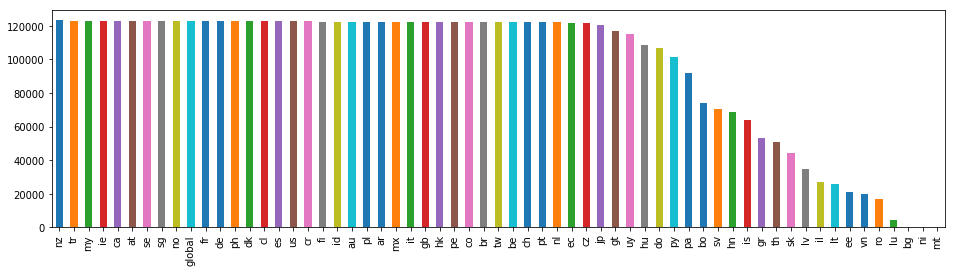

In [11]:
fig = plt.figure(figsize=(16, 4))
df_ranking['Region'].value_counts().plot(kind='bar')

In [12]:
print(df_ranking['Region'].value_counts().tail(30))

be    122190
ch    122184
pt    122184
nl    122182
ec    121984
cz    121680
jp    120784
gt    116769
uy    115325
hu    108770
do    106925
py    101546
pa     92120
bo     73889
sv     70601
hn     68602
is     64082
gr     52927
th     50600
sk     44267
lv     34931
il     27184
lt     25851
ee     20773
vn     19961
ro     16756
lu      4144
bg       103
ni       102
mt        50
Name: Region, dtype: int64


See what's happening in the data of region 'lu'

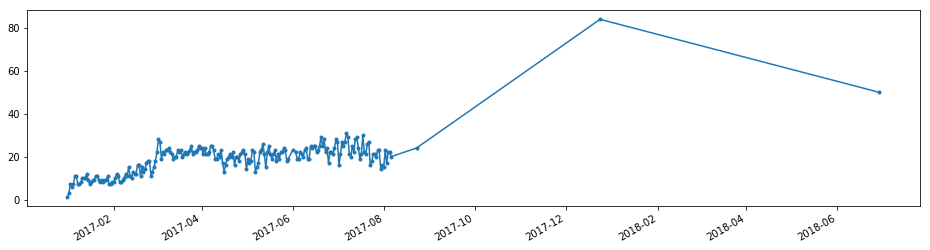

In [13]:
fig = plt.figure(figsize=(16, 4))
df_ranking.loc[df_ranking['Region'] == 'lu']['Date'].value_counts().plot(kind='line', style='.-')

Some days do not have data at all

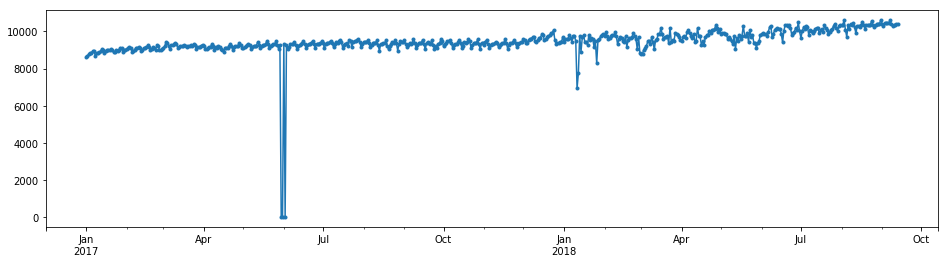

In [14]:
fig = plt.figure(figsize=(16, 4))
x_range = pd.date_range(df_ranking['Date'].min(), df_ranking['Date'].max())
df_ranking['Date'].value_counts().reindex(x_range, fill_value=0).plot(kind='line', style='.-')

In [15]:
df_continents.head()

,code,continent
0,AF,Africa
1,AN,Antarctica
2,AS,Asia
3,EU,Europe
4,NA,North America


In [16]:
df_countries.head()

,code,capital,continent,currency,languages,name,native,phone
0,AD,Andorra la Vella,EU,EUR,[ca],Andorra,Andorra,376
1,AE,Abu Dhabi,AS,AED,[ar],United Arab Emirates,دولة الإمارات العربية المتحدة,971
2,AF,Kabul,AS,AFN,"[ps, uz, tk]",Afghanistan,افغانستان,93
3,AG,Saint John's,NA,XCD,[en],Antigua and Barbuda,Antigua and Barbuda,1268
4,AI,The Valley,NA,XCD,[en],Anguilla,Anguilla,1264


## A little bit preprocessing

In [17]:
df_region = pd.merge(df_countries, df_continents, right_on='code', left_on='continent')
df_region = df_region[['code_x', 'name', 'code_y', 'continent_y']]
df_region.columns = ['country_code', 'country', 'continent_code', 'continent']
df_region = df_region.append({
    'country_code': 'GLOBAL',
    'country': 'GLOBAL',
    'continent_code': 'GLOBAL',
    'continent': 'GLOBAL'
}, ignore_index=True)
df_region['country_code'] = df_region['country_code'].str.lower()

In [18]:
df_region.tail()

,country_code,country,continent_code,continent
246,um,U.S. Minor Outlying Islands,OC,Oceania
247,vu,Vanuatu,OC,Oceania
248,wf,Wallis and Futuna,OC,Oceania
249,ws,Samoa,OC,Oceania
250,global,GLOBAL,GLOBAL,GLOBAL


In [19]:
df_ranking.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [20]:
df_ranking_region = pd.merge(df_ranking, df_region, left_on='Region', right_on='country_code')

In [21]:
df_ranking_region.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,country_code,country,continent_code,continent
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,ec,Ecuador,SA,South America
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,ec,Ecuador,SA,South America
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,ec,Ecuador,SA,South America
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,ec,Ecuador,SA,South America
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,ec,Ecuador,SA,South America


### Extract more columns from 'Date' column

In [22]:
df_date = df_ranking_region[['Date']]
df_date = df_date.drop_duplicates()
df_date = df_date.reset_index(drop=True)
df_date = df_date.sort_values(['Date'])

In [23]:
df_date.head()

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05


In [24]:
def year (d):
    return f'Y{d.year}'

print(year(df_date['Date'][0]))

Y2017


In [25]:
def monthofyear (d):
    return 'M'.join((str(d.year), str(d.month).zfill(2)))

print(monthofyear(df_date['Date'][0]))

2017M01


In [26]:
def quarterofyear (d):
    return 'Q'.join((str(d.year), str(d.quarter)))

print(quarterofyear(df_date['Date'][0]))

2017Q1


In [27]:
def weekofyear (d):
    if d.month == 1 and d.week == 52:
        return 'W'.join((str(d.year - 1), str(d.week).zfill(2)))
    else:
        return 'W'.join((str(d.year), str(d.week).zfill(2)))

print(weekofyear(df_date['Date'][0]))
print(weekofyear(df_date['Date'][10]))

2016W52
2017W02


In [28]:
df_date.count()

Date    618
dtype: int64

In [29]:
df_date['Year'] = df_date['Date'].apply(lambda x: year(x))

In [30]:
df_date['Quarterofyear'] = df_date['Date'].apply(lambda x: quarterofyear(x))

In [31]:
df_date['Monthofyear'] = df_date['Date'].apply(lambda x: monthofyear(x))

In [32]:
df_date['Weekofyear'] = df_date['Date'].apply(lambda x: weekofyear(x))

In [33]:
df_date.head()

,Date,Year,Quarterofyear,Monthofyear,Weekofyear
0,2017-01-01,Y2017,2017Q1,2017M01,2016W52
1,2017-01-02,Y2017,2017Q1,2017M01,2017W01
2,2017-01-03,Y2017,2017Q1,2017M01,2017W01
3,2017-01-04,Y2017,2017Q1,2017M01,2017W01
4,2017-01-05,Y2017,2017Q1,2017M01,2017W01


In [34]:
df_date.tail()

,Date,Year,Quarterofyear,Monthofyear,Weekofyear
605,2018-09-09,Y2018,2018Q3,2018M09,2018W36
606,2018-09-10,Y2018,2018Q3,2018M09,2018W37
607,2018-09-11,Y2018,2018Q3,2018M09,2018W37
608,2018-09-12,Y2018,2018Q3,2018M09,2018W37
609,2018-09-13,Y2018,2018Q3,2018M09,2018W37


In [35]:
df_ranking = df_ranking_region.merge(df_date, on='Date', how='left')
# df_ranking_2017 = df_ranking.loc[df_ranking['Year'] == 'Y2017']
# df_ranking_2017.tail()

Missing data for week 2017W22

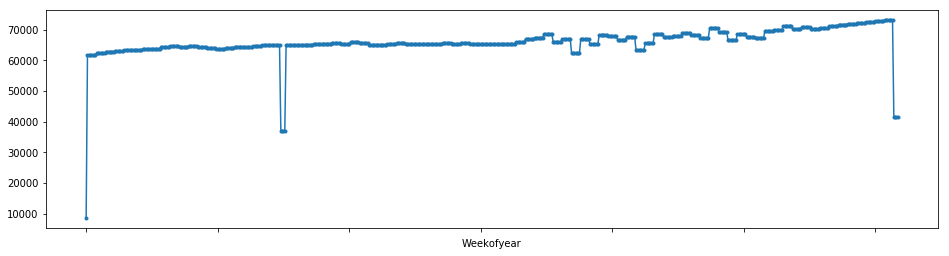

In [36]:
fig = plt.figure(figsize=(16, 4))
df_ranking['Weekofyear'].value_counts().reindex(df_date['Weekofyear'].sort_values(), fill_value=0).plot(kind='line', style='.-')

### Unique songs

In [37]:
df_songs = df_ranking[['URL', 'Track Name', 'Artist']].drop_duplicates(['URL'])
df_songs.count()

URL           35296
Track Name    35296
Artist        35296
dtype: int64

## Aggregate stream counts

In [38]:
df_ranking_continent = df_ranking.groupby(['URL', 'continent', 'Date']).sum()
df_ranking_continent = df_ranking_continent.reset_index()
df_ranking_continent = df_ranking_continent.merge(df_date, on='Date', how='left')
df_ranking_continent.head()

,URL,continent,Date,Position,Streams,Year,Quarterofyear,Monthofyear,Weekofyear
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-24,681,75974,Y2017,2017Q1,2017M03,2017W12
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-25,704,65583,Y2017,2017Q1,2017M03,2017W12
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-26,613,70725,Y2017,2017Q1,2017M03,2017W12
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-27,442,109785,Y2017,2017Q1,2017M03,2017W13
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-28,348,127947,Y2017,2017Q1,2017M03,2017W13


In [39]:
df_ranking_continent_daily = df_ranking_continent.merge(df_songs, on='URL', how='left')

In [40]:
df_ranking_continent_daily.sort_values(['Streams'], ascending=[False]).head()

,URL,continent,Date,Position,Streams,Year,Quarterofyear,Monthofyear,Weekofyear,Track Name,Artist
1326481,https://open.spotify.com/track/4aWmUDTfIPGksMN...,GLOBAL,2017-05-27,1,11381520,Y2017,2017Q2,2017M05,2017W21,Despacito (Featuring Daddy Yankee),Luis Fonsi
1077034,https://open.spotify.com/track/3ee8Jmje8o58CHK...,GLOBAL,2018-06-19,1,10415088,Y2018,2018Q2,2018M06,2018W25,SAD!,XXXTENTACION
2272650,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017-03-03,1,9891056,Y2017,2017Q1,2017M03,2017W09,Shape of You,Ed Sheeran
1326482,https://open.spotify.com/track/4aWmUDTfIPGksMN...,GLOBAL,2017-05-28,1,9849173,Y2017,2017Q2,2017M05,2017W21,Despacito (Featuring Daddy Yankee),Luis Fonsi
668246,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,GLOBAL,2018-07-20,1,9847333,Y2018,2018Q3,2018M07,2018W29,In My Feelings,Drake


In [41]:
df_ranking_continent_yearly = df_ranking_continent_daily.groupby(['URL', 'continent', 'Year'])['Streams'].sum()
df_ranking_continent_yearly = df_ranking_continent_yearly.reset_index()
df_ranking_continent_yearly = df_ranking_continent_yearly.merge(df_songs, on='URL', how='left')
df_ranking_continent_yearly.head()

,URL,continent,Year,Streams,Track Name,Artist
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,Y2017,7304763,Still Got Time,ZAYN
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Europe,Y2017,41958001,Still Got Time,ZAYN
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,GLOBAL,Y2017,104141294,Still Got Time,ZAYN
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,North America,Y2017,27114782,Still Got Time,ZAYN
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Oceania,Y2017,10614246,Still Got Time,ZAYN


In [42]:
df_ = df_ranking_continent_yearly[df_ranking_continent_yearly['continent'] == 'GLOBAL']
df_.sort_values(['Streams'], ascending=[False]).head()

,URL,continent,Year,Streams,Track Name,Artist
54290,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,Y2017,1470919913,Shape of You,Ed Sheeran
36654,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,Y2017,908572590,Despacito - Remix,Luis Fonsi
18021,https://open.spotify.com/track/2XW4DbS6NddZxRP...,GLOBAL,Y2018,776178003,God's Plan,Drake
32348,https://open.spotify.com/track/4aWmUDTfIPGksMN...,GLOBAL,Y2017,735938109,Despacito (Featuring Daddy Yankee),Luis Fonsi
45557,https://open.spotify.com/track/6RUKPb4LETWmmr3...,GLOBAL,Y2017,682354910,Something Just Like This,The Chainsmokers


In [43]:
# df_ranking_continent_weekly = df_ranking_continent_daily.groupby(['URL', 'continent', 'Weekofyear'])['Streams'].sum()
# Smooth out missing data
df_ranking_continent_weekly = df_ranking_continent_daily.groupby(['URL', 'continent', 'Weekofyear'])['Streams'].mean()*7
df_ranking_continent_weekly = df_ranking_continent_weekly.reset_index()
df_ranking_continent_weekly = df_ranking_continent_weekly.merge(df_songs, on='URL', how='left')
df_ranking_continent_weekly.head()

,URL,continent,Weekofyear,Streams,Track Name,Artist
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017W12,495324.666667,Still Got Time,ZAYN
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017W13,910734.000000,Still Got Time,ZAYN
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017W14,781302.000000,Still Got Time,ZAYN
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017W15,626129.000000,Still Got Time,ZAYN
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017W16,715851.000000,Still Got Time,ZAYN


In [44]:
df_ = df_ranking_continent_weekly[df_ranking_continent_weekly['continent'] == 'GLOBAL']
df_.sort_values(['Streams'], ascending=[False]).head(20)

,URL,continent,Weekofyear,Streams,Track Name,Artist
33697,https://open.spotify.com/track/0bAkKNCQfWkexHF...,GLOBAL,2018W29,6.716053e+07,In My Feelings,Drake
124465,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,GLOBAL,2018W29,6.457704e+07,In My Feelings,Drake
124466,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,GLOBAL,2018W30,6.386189e+07,In My Feelings,Drake
422995,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017W10,6.007302e+07,Shape of You,Ed Sheeran
33696,https://open.spotify.com/track/0bAkKNCQfWkexHF...,GLOBAL,2018W28,5.685987e+07,In My Feelings,Drake
124467,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,GLOBAL,2018W31,5.685607e+07,In My Feelings,Drake
422994,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017W09,5.640900e+07,Shape of You,Ed Sheeran
138626,https://open.spotify.com/track/2XW4DbS6NddZxRP...,GLOBAL,2018W04,5.456682e+07,God's Plan,Drake
280818,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017W21,5.447583e+07,Despacito - Remix,Luis Fonsi
138630,https://open.spotify.com/track/2XW4DbS6NddZxRP...,GLOBAL,2018W08,5.393889e+07,God's Plan,Drake


In [45]:
df_songs[df_songs['Track Name'] == 'Something Just Like This']['URL'].to_string()

'10644    https://open.spotify.com/track/6RUKPb4LETWmmr3...'

In [46]:
df_ = df_ranking_continent_weekly[df_ranking_continent_weekly['Track Name'] == "Something Just Like This"]
df_.sort_values(['Weekofyear'], ascending=[True]).head(20)

,URL,continent,Weekofyear,Streams,Track Name,Artist
351601,https://open.spotify.com/track/6RUKPb4LETWmmr3...,Asia,2017W08,3.355348e+06,Something Just Like This,The Chainsmokers
351765,https://open.spotify.com/track/6RUKPb4LETWmmr3...,GLOBAL,2017W08,3.071345e+07,Something Just Like This,The Chainsmokers
351929,https://open.spotify.com/track/6RUKPb4LETWmmr3...,Oceania,2017W08,1.136809e+06,Something Just Like This,The Chainsmokers
351683,https://open.spotify.com/track/6RUKPb4LETWmmr3...,Europe,2017W08,1.054003e+07,Something Just Like This,The Chainsmokers
352011,https://open.spotify.com/track/6RUKPb4LETWmmr3...,South America,2017W08,1.726541e+06,Something Just Like This,The Chainsmokers
351847,https://open.spotify.com/track/6RUKPb4LETWmmr3...,North America,2017W08,9.186999e+06,Something Just Like This,The Chainsmokers
351766,https://open.spotify.com/track/6RUKPb4LETWmmr3...,GLOBAL,2017W09,3.060435e+07,Something Just Like This,The Chainsmokers
351684,https://open.spotify.com/track/6RUKPb4LETWmmr3...,Europe,2017W09,1.267029e+07,Something Just Like This,The Chainsmokers
352012,https://open.spotify.com/track/6RUKPb4LETWmmr3...,South America,2017W09,1.881876e+06,Something Just Like This,The Chainsmokers
351930,https://open.spotify.com/track/6RUKPb4LETWmmr3...,Oceania,2017W09,1.435369e+06,Something Just Like This,The Chainsmokers


In [47]:
df_ranking_continent_weekly.to_csv('ranking_continent_weekly.csv', index=False)

In [48]:
df_sjlt_weekly = df_ranking_continent_weekly[df_ranking_continent_weekly['Track Name'] == "Something Just Like This"]
df_sjlt_weekly = df_sjlt_weekly.sort_values(['Weekofyear', 'Streams'], ascending=[True, False])

In [49]:
df_sjlt_weekly.to_csv('something_just_like_this_weekly.csv', index=False)

In [50]:
df_sjlt_daily = df_ranking_continent_daily[df_ranking_continent_daily['Track Name'] == "Something Just Like This"]
df_sjlt_daily = df_sjlt_daily.sort_values(['Weekofyear', 'Streams'], ascending=[True, False])

In [51]:
df_sjlt_daily.to_csv('something_just_like_this_daily.csv', index=False)